## Time series project (IBM through coursera): Analysis of daily count of visitors on a website

### import the libraries and the data

In [8]:
# Setup
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sys, os
os.chdir('C:/Users/julia/OneDrive/Desktop/Coursera/time series Python/project')
import warnings
warnings.simplefilter(action='ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [10]:
# load data
daily_visits = pd.read_csv('./daily-website-visitors.csv')
daily_visits

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


In [44]:
# load data and convert to datetime
daily_visits = pd.read_csv('./daily-website-visitors.csv', 
                           skipfooter=2, 
                           infer_datetime_format=True, 
                           header=0, 
                           index_col=0, engine='python')

daily_visits.index = pd.to_datetime(daily_visits.index)
daily_visits = daily_visits.iloc[:,[2,4]]
daily_visits

,Date,Unique.Visits
Row,,
1970-01-01 00:00:00.000000001,9/14/2014,"1,582"
1970-01-01 00:00:00.000000002,9/15/2014,"2,528"
1970-01-01 00:00:00.000000003,9/16/2014,"2,630"
1970-01-01 00:00:00.000000004,9/17/2014,"2,614"
1970-01-01 00:00:00.000000005,9/18/2014,"2,366"
...,...,...
1970-01-01 00:00:00.000002161,8/13/2020,"2,780"
1970-01-01 00:00:00.000002162,8/14/2020,"2,308"
1970-01-01 00:00:00.000002163,8/15/2020,"1,696"


<Axes: xlabel='Date', ylabel='Unique.Visits'>

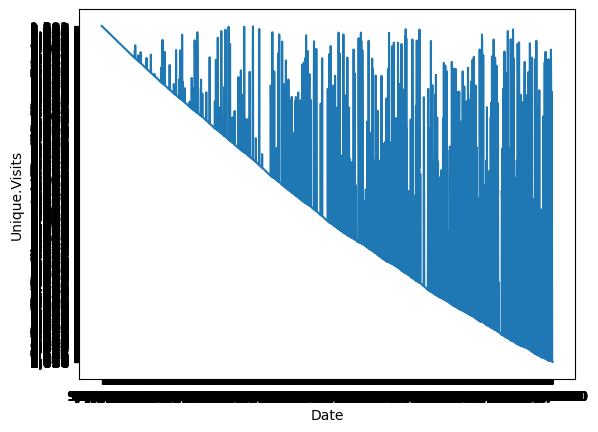

In [42]:
# create the time series plot
sns.lineplot(x = "Date", y = "Unique.Visits",
             data = daily_visits)